# Monte Carlo - Knapsack Counting

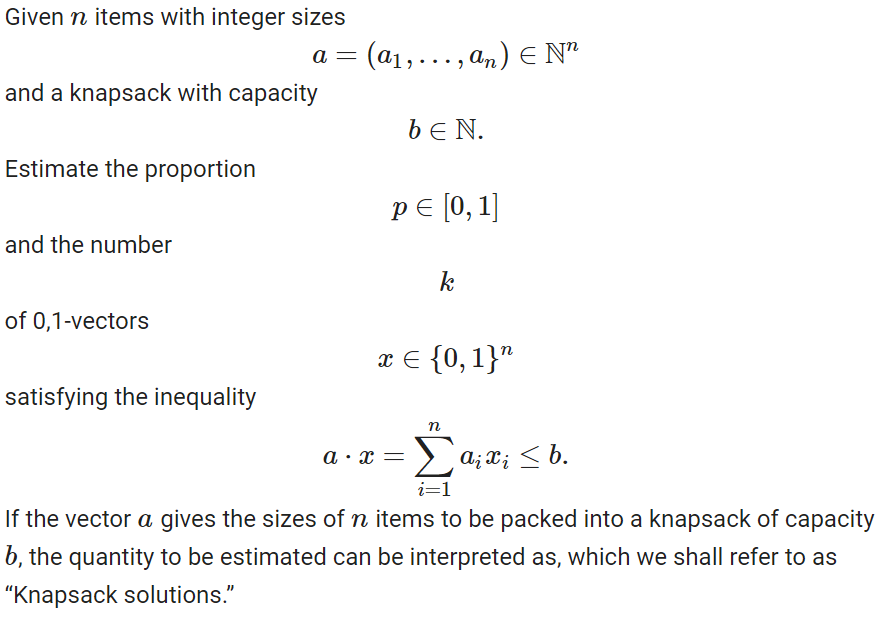

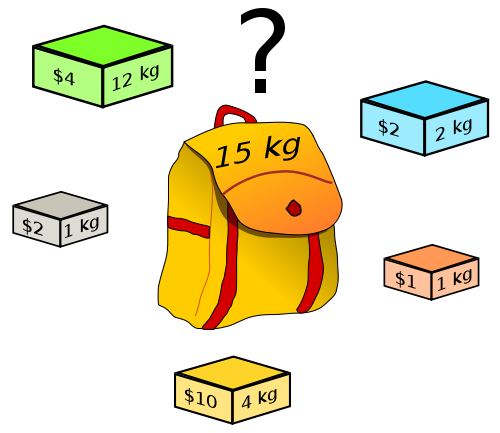

#Método Exacto

In [ ]:
import numpy as np
sizes = np.array([1,1,2,4,12])
randomVector = np.array([1,1,0,1,0])
sizes*randomVector


array([1, 1, 0, 4, 0])

In [ ]:
sum(sizes*randomVector) #if value is less than 15kg we have a solution

6

In [ ]:
from itertools import product
list(product((0,1),repeat=5))

[(0, 0, 0, 0, 0),
 (0, 0, 0, 0, 1),
 (0, 0, 0, 1, 0),
 (0, 0, 0, 1, 1),
 (0, 0, 1, 0, 0),
 (0, 0, 1, 0, 1),
 (0, 0, 1, 1, 0),
 (0, 0, 1, 1, 1),
 (0, 1, 0, 0, 0),
 (0, 1, 0, 0, 1),
 (0, 1, 0, 1, 0),
 (0, 1, 0, 1, 1),
 (0, 1, 1, 0, 0),
 (0, 1, 1, 0, 1),
 (0, 1, 1, 1, 0),
 (0, 1, 1, 1, 1),
 (1, 0, 0, 0, 0),
 (1, 0, 0, 0, 1),
 (1, 0, 0, 1, 0),
 (1, 0, 0, 1, 1),
 (1, 0, 1, 0, 0),
 (1, 0, 1, 0, 1),
 (1, 0, 1, 1, 0),
 (1, 0, 1, 1, 1),
 (1, 1, 0, 0, 0),
 (1, 1, 0, 0, 1),
 (1, 1, 0, 1, 0),
 (1, 1, 0, 1, 1),
 (1, 1, 1, 0, 0),
 (1, 1, 1, 0, 1),
 (1, 1, 1, 1, 0),
 (1, 1, 1, 1, 1)]

In [ ]:
def isValid(weightLimit,objectsWeights,randomVector):
  weight = 0
  for i in range(len(objectsWeights)):
    weight += randomVector[i]*objectsWeights[i]
    if(weight>weightLimit):return False
  return True 

def exactKnapsackProportion(weightLimit,objectsWeights):
  vecSize = len(objectsWeights)
  spaceSize = 2**vecSize
  validSolutions = 0


  for randomVector in product((0,1),repeat=len(objectsWeights)):
    validSolutions += 1 if isValid(weightLimit,objectsWeights,randomVector) else 0    

  return validSolutions/spaceSize
  
exactKnapsackProportion(15,[1,1,2,4,12])

0.71875

#Método Montecarlo

In [ ]:
from random import randint
def approxKnapsackProportion(weightLimit,objectsWeights,sample):
  vecSize = len(objectsWeights)
  spaceSize = sample
  #assert (sample<spaceSize)
  validSolutions = 0


  for i in range(sample):
    randomVector = [randint(0,1) for _ in range(vecSize)]
    validSolutions += 1 if isValid(weightLimit,objectsWeights,randomVector) else 0    

  return validSolutions/spaceSize

approxKnapsackProportion(15,[1,1,2,4,12],2**5) #check with a "known" proportion

0.71875

Estimate the proportion and number of “Knapsack solutions.” if the sizes are (1,2,3,4,5,6,7,9,10) and the capacity of the knapsack is 10 using Monte Carlo with 1.000, 10.000 random binary vectors,

In [ ]:
[i for i in range(1,11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
approxKnapsackProportion(10,[i for i in range(1,11)],1_000)

0.041

In [ ]:
approxKnapsackProportion(10,[i for i in range(1,11)],10_000) 


0.0422

For a better aproxiation using means

In [ ]:
import numpy as np
np.mean([approxKnapsackProportion(10,[i for i in range(1,11)],1_000) for _ in range(100)])

0.04161999999999999

In [ ]:
import numpy as np
np.mean([approxKnapsackProportion(10,[i for i in range(1,11)],10_000) for _ in range(100)])

0.042098000000000003

#Graficos con knapsacks de tamaños 10,50,100,1275

Estimate the proportion and number of “Knapsack solutions.” if the sizes are (1,2,3,4,…, 49,50) and the capacity of the knapsack are 10, 50, 100, 1275 using Mote Carlo with 10.000, 100.000 and 1.000.000 random binary vectors.

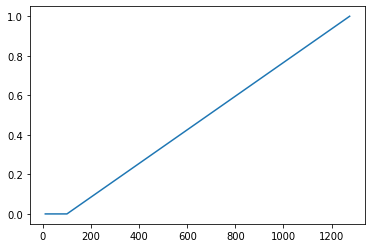

In [ ]:
import matplotlib.pyplot as plt
#
xs = [10,50,100,1275]
# xs = [10_000, 100_000, 1_000_000]
objects = [i for i in range(1,51)]
ys = [approxKnapsackProportion(knapSize,objects,10_000) for knapSize in xs ]
plt.plot(xs,ys)
plt.show()

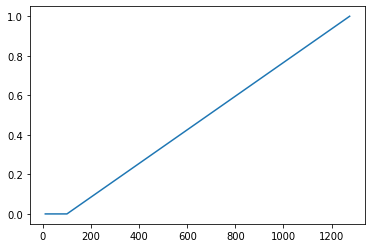

In [ ]:
import matplotlib.pyplot as plt
#
xs = [10,50,100,1275]
# xs = [10_000, 100_000, 1_000_000]
objects = [i for i in range(1,51)]
ys = [approxKnapsackProportion(knapSize,objects,100_000) for knapSize in xs ]
plt.plot(xs,ys)
plt.show()

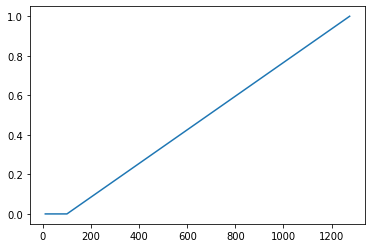

In [ ]:
import matplotlib.pyplot as plt
#
xs = [10,50,100,1275]
# xs = [10_000, 100_000, 1_000_000]
objects = [i for i in range(1,51)]
ys = [approxKnapsackProportion(knapSize,objects,1_000_000) for knapSize in xs ]
plt.plot(xs,ys)
plt.show()

We see the natural increase of solutions with the increase of size, and not any noticeable diference with bigger sampling